In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

from tools.misc_tools import get_h5_data


# One vKolm Arrowhead

In [5]:
material_params = {'W': 30,
                   'beta': 0.9,
                   'Re': 0.5,
                   'L': np.infty,
                   'eps': 1e-3}

system_params = {'ndim': 2,
                 'Lx': 8 * np.pi,
                 'n': 1}

solver_params = {'Nx': 256,
                 'Ny': 256}

W, eps = material_params['W'], material_params['eps']
Lx, Nx, Ny = system_params['Lx'], solver_params['Nx'], solver_params['Ny']

In [6]:
def translate(field, shift_x):
    shift_ind = int(shift_x/Lx * Nx)
    field = np.roll(field, shift_ind, axis=0)
    return field

def shift_reflect(field, parity='even'):
    field = np.flip(field, axis=0)
    field = np.roll(field, Ny//2, axis=1)
    if parity == 'odd': field *= -1
    return field



In [7]:
data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='recent-', subdir='arrowhead_2D', s=-1)

x, y = data_fields['x'], data_fields['y']
c11, c12, c22 = data_fields['c11'][0,:,:], data_fields['c12'][0,:,:], data_fields['c22'] [0,:,:]
u, v = data_fields['u'][0,:,:], data_fields['v'][0,:,:]

trace = c11 + c22

In [8]:
mean_trace_x = np.mean(trace, axis=0)

if mean_trace_x[0] > mean_trace_x[Ny//2]:
    c11, c12, c22, trace = shift_reflect(c11), shift_reflect(c12, parity='odd'), shift_reflect(c22), shift_reflect(trace), 
    u, v = shift_reflect(u, parity='odd'), shift_reflect(v)

x_shift = Lx//2 - x[trace[:, Ny//2] == np.max(trace[:, Ny//2])][0]

c11, c12, c22, trace = translate(c11, x_shift), translate(c12, x_shift), translate(c22, x_shift), translate(trace, x_shift), 
u, v = translate(u, x_shift), translate(v, x_shift)


In [9]:
dx = lambda f: np.gradient(f, x, axis=0) 
dy = lambda f: np.gradient(f, y, axis=1) 
c = lambda x: np.cosh(x / (eps * W) ** 0.5)

def colourmap(field):
    plt.figure(figsize=(10,3))
    xx, yy = np.meshgrid(x, y, indexing='ij')
    plt.pcolormesh(xx, yy, field, cmap='inferno', shading='gouraud',
                       vmin=field.min(), vmax=field.max())
    plt.colorbar()

def contour(field, value=None):
    xx, yy = np.meshgrid(x, y, indexing='ij')
    if value is None:
        plt.contour(xx, yy, field, cmap='Greys', alpha=0.8, levels=10)
    else:
        plt.contour(xx, yy, field, cmap='Greys', alpha=0.8, levels=[value])

def quiver(u, v):
    skip = Ny // 32
    xx, yy = np.meshgrid(x[::skip], y[::skip], indexing='ij')
    plt.quiver(xx, yy, u[::skip, ::skip], v[::skip, ::skip], cmap='Greys', alpha=0.8, scale_units='inches', scale=0.5, color='white')

    

In [10]:
divT1 = dx(c11) + dy(c12)
divT2 = dx(c12) + dy(c22)


D = (1/2 * (2 * dx(u) ** 2 + dx(v) ** 2 + dy(u) ** 2 + 2 * dy(v) ** 2 + 2 * dx(u) * dy(v) ) ) ** 0.5
omega = (1/2 * (dx(v) ** 2 + dy(u) ** 2 - 2 * dx(u) * dy(v) ) ) ** 0.5
shear = 1/4 * (dx(u) ** 2 + dx(v) ** 2 + dy(u) ** 2 + dy(v) ** 2 )

xi = (D-omega) / (D+omega)
d = (xi+1 * shear)


e11 = dx(u)
e12 = 0.5 * (dx(v) + dy(u))
e22 = dy(v)

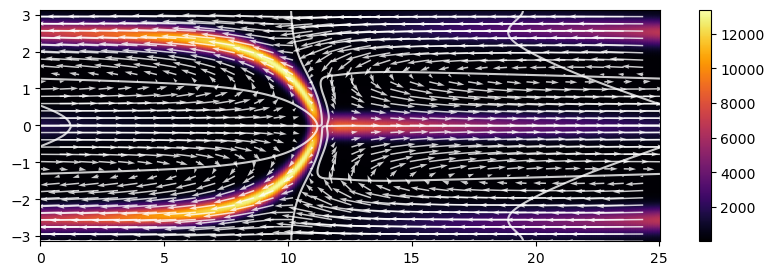

In [11]:
if Lx == 8*np.pi: c = 0.0685 # Lx = 8pi
if Lx == 6*np.pi: c = 0.0706 # Lx = 6pi
colourmap(trace)
contour(u-c,0)
contour(v,0)
quiver(u-c, v)


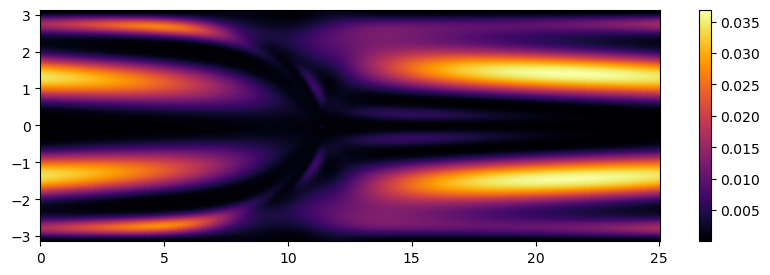

In [12]:
colourmap(d)
# contour(u-c,0)
# contour(v,0)
# quiver(u-c, v)


# Check that Stagnation Points don't move

In [13]:
material_params = {'W': 30,
                   'beta': 0.9,
                   'Re': 0.5,
                   'L': np.infty,
                   'eps': 1e-3}

system_params = {'ndim': 2,
                 'Lx': 6 * np.pi,
                 'n': 1}

solver_params = {'Nx': 256,
                 'Ny': 256}

W, eps = material_params['W'], material_params['eps']
Lx, Nx, Ny = system_params['Lx'], solver_params['Nx'], solver_params['Ny']

In [15]:
data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='full-', subdir='large_data', s=-1)

t = data_fields['t']
x, y = data_fields['x'], data_fields['y']
c11, c12, c22 = data_fields['c11'], data_fields['c12'], data_fields['c22']
u, v = data_fields['u'], data_fields['v']

trace = c11 + c22

In [16]:
def translate(field, shift_x):
    shift_ind = int(shift_x/Lx * Nx)
    field = np.roll(field, shift_ind, axis=-2)
    return field

def shift_reflect(field, parity='even'):
    field = np.flip(field, axis=-2)
    field = np.roll(field, Ny//2, axis=-1)
    if parity == 'odd': field *= -1
    return field



In [17]:
mean_trace_x = np.mean(trace[0,:,:], axis=0)

if mean_trace_x[0] > mean_trace_x[Ny//2]:
    c11, c12, c22, trace = shift_reflect(c11), shift_reflect(c12, parity='odd'), shift_reflect(c22), shift_reflect(trace), 
    u, v = shift_reflect(u, parity='odd'), shift_reflect(v)

x_shift = Lx//2 - x[trace[0, :, Ny//2] == np.max(trace[0, :, Ny//2])][0]

c11, c12, c22, trace = translate(c11, x_shift), translate(c12, x_shift), translate(c22, x_shift), translate(trace, x_shift), 
u, v = translate(u, x_shift), translate(v, x_shift)

In [18]:
# Get centreline fields
u_cl = (u[:,:,Ny//2]+u[:,:,Ny//2-1]) / 2
v_cl = (v[:,:,Ny//2]+v[:,:,Ny//2-1]) / 2

if Lx == 8*np.pi: c = 0.0684 # Lx = 8pi
if Lx == 6*np.pi: c = 0.0706 # Lx = 6pi

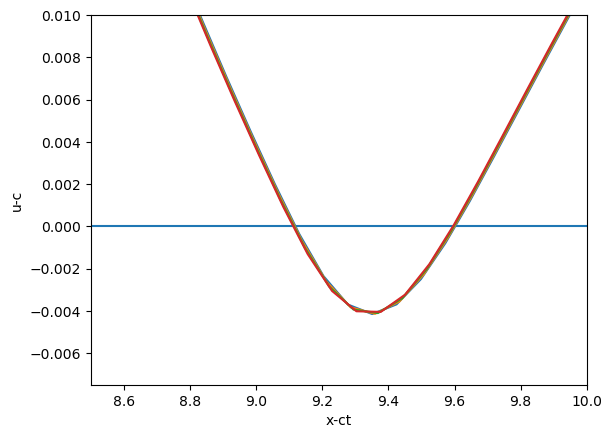

In [21]:
def plot_cl_u(t_idx):

    x_dash = x - c*(t[t_idx] - t[0])
    u_dash = u_cl[t_idx,:] - c

    for i in range(Nx):
        x_dash[i] = x_dash[i] % Lx

    
    plt.plot(x_dash, u_dash)


plt.hlines(xmin=0, xmax=Lx, y=0)

plot_cl_u(0)
plot_cl_u(2)
plot_cl_u(4)
plot_cl_u(6)
plt.xlim([8.5,10])
plt.ylim([-0.0075, 0.01])
t
plt.ylabel('u-c')
plt.xlabel('x-ct')


plt.savefig('../images/stagnation_points.png')

# Eigenfunction

Protocol: Ran Lx=8pi for long time before with symmetry constraint. Then relaxed this constraint (suffix=lin-stab). NB to do this properly (to see exponential growth) should increase reso to 512 by 512

In [929]:
material_params = {'W': 30,
                   'beta': 0.9,
                   'Re': 0.5,
                   'L': np.infty,
                   'eps': 1e-3}

system_params = {'ndim': 2,
                 'Lx': 8 * np.pi,
                 'n': 1}

solver_params = {'Nx': 256,
                 'Ny': 256}

W, eps = material_params['W'], material_params['eps']
Lx, Nx, Ny = system_params['Lx'], solver_params['Nx'], solver_params['Ny']

In [953]:
data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='recent-', subdir='arrowhead_2D', s=-1)

idx = -1

x, y = data_fields['x'], data_fields['y']
C11, C12, C22 = data_fields['c11'][idx,:,:], data_fields['c12'][idx,:,:], data_fields['c22'] [idx,:,:]
U, V = data_fields['u'][idx,:,:], data_fields['v'][idx,:,:]

Trace = C11 + C22

t_base = data_fields['t'][idx]

In [954]:
data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='full-lin_stab', subdir='large_data', s=-1)

idx = 1

t = data_fields['t'][idx]
x, y = data_fields['x'], data_fields['y']
c11, c12, c22 = data_fields['c11'][idx,:,:], data_fields['c12'][idx,:,:], data_fields['c22'] [idx,:,:]
u, v = data_fields['u'][idx,:,:], data_fields['v'][idx,:,:]

trace = c11 + c22

504.9999999191641

/var/folders/y5/2qcl1dzx3nngc4kp57y9yvlr0000gn/T/ipykernel_14572/852773927.py:2: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  Trace_shifted = scipy.ndimage.interpolation.shift(Trace, shift=(shift_x, 0), mode='wrap')


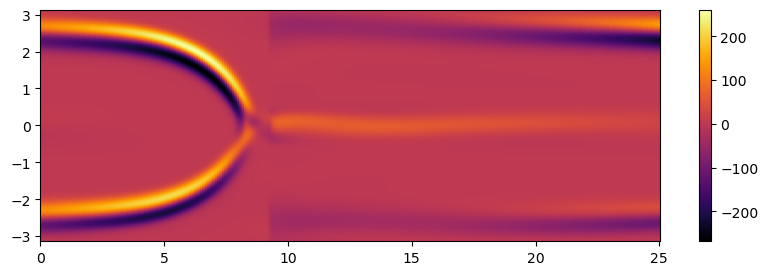

In [976]:
shift_x = 94.45
Trace_shifted = scipy.ndimage.interpolation.shift(Trace, shift=(shift_x, 0), mode='wrap')
colourmap(trace-Trace_shifted)

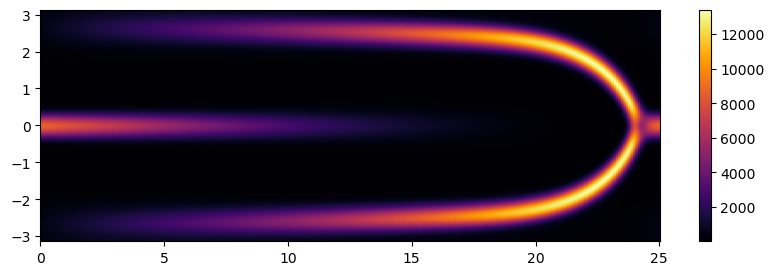

In [947]:
colourmap(Trace)